In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for 2D visualization
y = iris.target

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [3]:
# Standardize the features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Define distance metrics to compare
distance_metrics = ['euclidean', 'manhattan', 'minkowski']
k_values = [3, 5, 7]  # Different values of k to test

C:\Users\Azad Ahmad\AppData\Local\Temp\ipykernel_13968\688549652.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


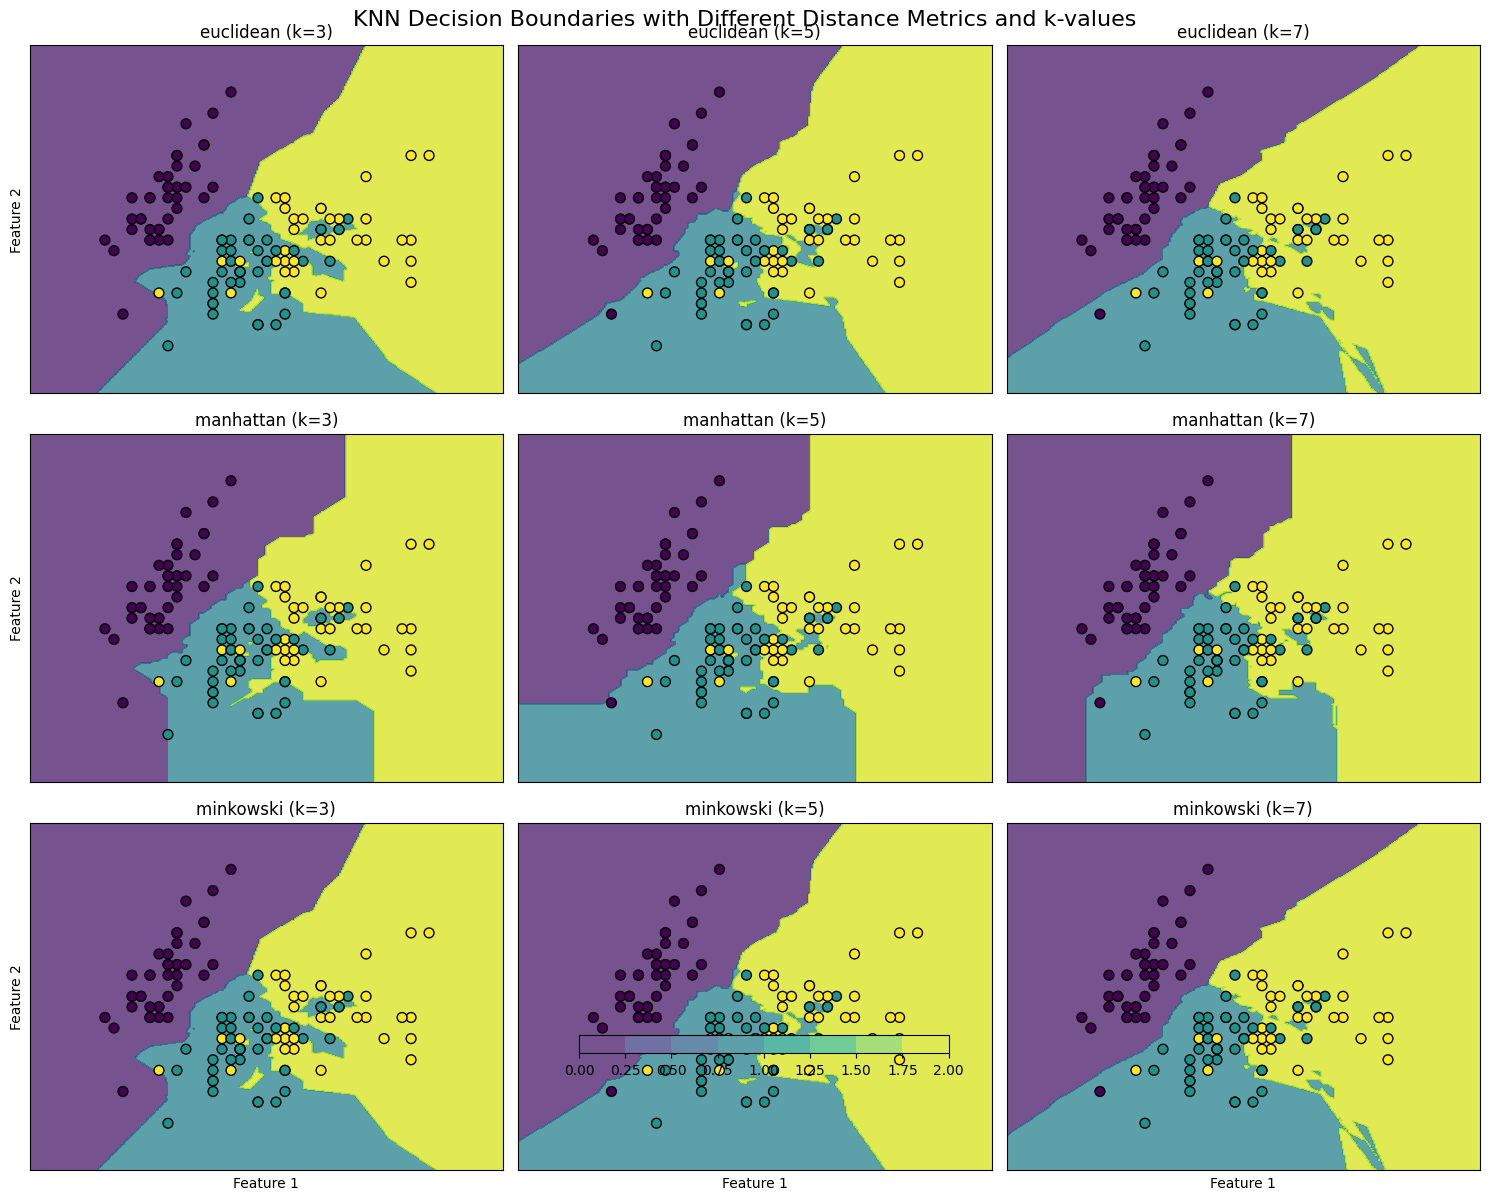

In [12]:
# Create subplots for each metric and k-value
fig, axes = plt.subplots(len(distance_metrics), len(k_values), figsize=(15, 12))
fig.suptitle('KNN Decision Boundaries with Different Distance Metrics and k-values', fontsize=16)

# List to hold contour plots for color bar
contours = []  

# Plot decision boundaries for each combination of metric and k-value
for i, metric in enumerate(distance_metrics):
    for j, k in enumerate(k_values):
        # Train the KNN classifier with the given metric and k-value
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        
        # Create a grid of points to plot the decision boundaries
        h = 0.02
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        
        # Predict on the grid points
        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot the decision boundary and data points
        ax = axes[i, j]
        contour = ax.contourf(xx, yy, Z, alpha=0.75)
        contours.append(contour)  # Store contour plots for color bar
        scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', s=50)
        ax.set_title(f'{metric} (k={k})')
        ax.set_xticks(())
        ax.set_yticks(())
        
        # Add a color legend
        if j == 0:
            ax.set_ylabel('Feature 2')
        if i == len(distance_metrics) - 1:
            ax.set_xlabel('Feature 1')

# Add the color bar for the entire figure based on the first contour plot
fig.colorbar(contours[0], ax=axes.ravel().tolist(), orientation='horizontal', fraction=0.02, pad=0.04)

# Show the plot
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()